# Problem Statement

In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

# Introduction to Dataset

In [141]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [142]:
 
loan_df = pandas.read_csv('loan.csv')
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Getting the shape of the dataframe

In [143]:
loan_df.shape


(39717, 111)

As it can be seen that we have 111 columns.We will now remove the unnecessary columns which are not requried.Getting the list of the columns

In [144]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Cleaning the Data

### Columns With all values as Missing or NA

In [145]:
loan_df.isna().sum().sort_values(ascending =False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

We have seen from above that there are columns where all the values are NA.So we will drop those columns from the dataset

In [146]:
loan_df.dropna(how='all',axis=1,inplace=True)

Checking the shape of the dataframe again

In [147]:
loan_df.shape

(39717, 57)

Checking columns which have unique values.If some columns have only 1 unique value then those columns will not play any affect on Loan Charge Off and as well columns that have all values as unique values

In [148]:
columns=loan_df.nunique() 

### Columns with Same Value for All Rows < Unique Values = 1 >

In [149]:
# So we are dropping those columns from the dataframe as they won't be having any effect on the outcome of the loan
single_values_columns=columns[columns.values==1]
single_values_columns.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [150]:
loan_df.drop(list(single_values_columns.index),axis=1,inplace=True)

### Columns with Unique Value for All Rows < Unique Values = Data Set Rows >

In [151]:
# So we are dropping those columns from the dataframe as they won't be having any effect on the outcome of the loan
all_unique_values_columns=columns[columns.values==loan_df.shape[0]]
all_unique_values_columns.index

Index(['id', 'member_id', 'url'], dtype='object')

In [152]:
loan_df.drop(list(all_unique_values_columns.index),axis=1,inplace=True)

### Columns with Masked Values

In [153]:
#Looking at the dataset , we can see that there is a column that is masked column that does 
# not add any value to our EDA Process , so its better to remove the column
# zip_code-> The first 3 numbers of the zip code provided by the borrower in the loan application.
columns_to_drop=['zip_code']
loan_df.drop(columns=columns_to_drop,inplace=True)

### Row Level Filteration

In [154]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [155]:
# Since our objective of doing EDA is to identify whether a loan is charged off or fully paid , Having Records with current 
# status would add noise to the data and will also lead to effect our model. It is therefore recommended to 
# filter out rows that have status as current 
loan_df=loan_df[loan_df['loan_status']!='Current']

Checking the shape of the dataframe

In [156]:
loan_df.shape

(38577, 44)

### Missing Values

In [157]:
# Checking the Percentage of the missing values in the columns
((loan_df.isna().sum()/len(loan_df.index))*100).sort_values(ascending=False)

next_pymnt_d               100.000000
mths_since_last_record      92.897322
mths_since_last_delinq      64.559193
desc                        32.472717
emp_title                    6.185033
emp_length                   2.677761
pub_rec_bankruptcies         1.806776
last_pymnt_d                 0.184047
revol_util                   0.129611
title                        0.028514
last_credit_pull_d           0.005184
recoveries                   0.000000
pub_rec                      0.000000
revol_bal                    0.000000
total_acc                    0.000000
out_prncp                    0.000000
out_prncp_inv                0.000000
collection_recovery_fee      0.000000
last_pymnt_amnt              0.000000
total_pymnt                  0.000000
total_pymnt_inv              0.000000
open_acc                     0.000000
total_rec_int                0.000000
total_rec_late_fee           0.000000
total_rec_prncp              0.000000
loan_amnt                    0.000000
funded_amnt 

It can be seen from the above derivation that there are still columns where the number of missing values is still very high.We will remove those columns.The columns are
1. desc
2. next_payment_d
3. mths_since_last_record
4. mths_since_last_delinq

In [158]:
loan_df.drop(columns=['desc','next_pymnt_d','mths_since_last_delinq','mths_since_last_record'],inplace=True)

In [159]:
loan_df.shape

(38577, 40)

Checking the percentage of missing values again

In [160]:
((loan_df.isna().sum()/len(loan_df.index))*100).sort_values(ascending=False)

emp_title                  6.185033
emp_length                 2.677761
pub_rec_bankruptcies       1.806776
last_pymnt_d               0.184047
revol_util                 0.129611
title                      0.028514
last_credit_pull_d         0.005184
total_pymnt                0.000000
revol_bal                  0.000000
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_rec_int              0.000000
total_pymnt_inv            0.000000
total_rec_prncp            0.000000
open_acc                   0.000000
total_rec_late_fee         0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
last_pymnt_amnt            0.000000
pub_rec                    0.000000
loan_amnt                  0.000000
inq_last_6mths             0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0

Now we will check at row level to see if any row is having more NA values than the required

In [161]:
loan_df.isnull().sum(axis=1).sort_values(ascending=False)

14839    3
11282    3
24984    3
28980    3
16719    3
        ..
16077    0
16076    0
16075    0
16074    0
20428    0
Length: 38577, dtype: int64

It could be seen that there are  rows which have 4 null values,which should be fine as we have total 40 columns

We will now insert missing values into the other columns which have some missing values.We will be making use of Mode as the element which has to be inserted for NA values.The reason for picking mode is because of biasness which we may get for Numerical Columns.

### emp_length

In [162]:
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [163]:
mode_value=loan_df['emp_length'].mode()
loan_df['emp_length'].fillna(value=mode_value[0],inplace=True)
loan_df['emp_length'].isna().sum()

0

In [164]:
loan_df['emp_length'].value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### pub_rec_bankruptcies

In [165]:
mode_value_bankruptcies=loan_df['pub_rec_bankruptcies'].mode()
loan_df['pub_rec_bankruptcies'].fillna(value=mode_value_bankruptcies[0],inplace=True)
loan_df['pub_rec_bankruptcies'].isna().sum()

0

### emp_title

In [166]:
loan_df['emp_title'].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

In [167]:
mode_value=loan_df['emp_title'].mode()
loan_df['emp_title'].fillna(value=mode_value[0],inplace=True)
loan_df['emp_title'].isna().sum()

0

### pub_rec_bankruptcies

In [168]:
loan_df['pub_rec_bankruptcies'].value_counts()
loan_df['pub_rec_bankruptcies'].fillna(0,inplace=True)
loan_df['pub_rec_bankruptcies'].isna().sum()

0

### revol_util

This column defines Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit , so very high chances that the borrower has not done this event and hence value should 
be replaced by 0% and would also like to mention that when we look at the mode value , the same is also 0% but had it not be same , we still should have gone with assumption that borrower has not performed the event 


In [169]:
mode_value = loan_df['revol_util'].mode()[0]
loan_df['revol_util'].fillna("0%",inplace=True)
loan_df['revol_util'].isna().sum()

0

Checking the datatype of the Columns present in the dataframe

In [171]:
print(loan_df.columns)
print(loan_df.shape)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')
(38577, 40)


# Standardise the Data

Checking the information present in each column

In [636]:
loan_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,US Army,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,US Army,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [637]:
loan_df['emp_length']=loan_df['emp_length'].apply(lambda x: 0 if '<' in str(x) else (10 if '+' in str(x) else str(x).split()[0]))

In [638]:
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x:float(str(x)[:-1]))
loan_df['int_rate'].head(5)

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [639]:
loan_df['term']=loan_df['term'].apply(lambda x:float(str(x).replace(" months",'')))
loan_df['term'].head(5)

0    36.0
1    60.0
2    36.0
3    36.0
4    60.0
Name: term, dtype: float64

Out of all the columns which we have there will be only few columns which will be available to us at the time of filling a loan application and some variables will be generate after the loan has been approved based on the customer.We can remove those columns which are generated after the loan has been approved.


In [640]:
columns_after_loan_application =  [
  "earliest_cr_line",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

In [641]:
loan_df.drop(columns=columns_after_loan_application,inplace=True)

In our current dataset we have all the users whose loans have been:

1. Charged Off
2. Completed
3. Ongoing

Let us see the distribution of the dataset based on the loan status

In [642]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [643]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  float64
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                39717 non-null  object 
 9   emp_length               39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

# Derived Columns

### Issue Month and Issue Year : issue_month , issue_year

In [644]:
loan_df['issue_d']=loan_df.issue_d.apply(lambda d: datetime.strptime(d, '%b-%y'))
loan_df['issue_month']=loan_df['issue_d'].dt.month
loan_df['issue_year']=loan_df['issue_d'].dt.year

### Annual Income Range Bins : annual_inc_rng

In [645]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000]

rng = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-120000',
       '120000-140000', '140000-160000', '160000-180000', '180000-200000', '200000-220000',
       '220000-240000']

loan_df['annual_inc_rng'] = pandas.cut(loan_df.annual_inc, bins, labels = rng)

### Interest Range : int_rng

In [646]:
bins = [5, 10, 15, 20, 25]
rng = ['5-10', '10-15', '15-20', '20-25']
loan_df['int_rng'] = pandas.cut(loan_df.int_rate, bins, labels = rng)

### Loan Amount Range  : loan_amnt_rng

In [647]:
loan_df['loan_amnt_rng'] = pandas.cut(loan_df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000],
                                      labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

### DTI Range : dti_rng

In [648]:
bins = [0, 5, 10, 15, 20, 25]

rng = ['0-5', '5-10', '10-15', '15-20', '25-30']
loan_df['dti_rng']= pandas.cut(loan_df.dti, bins, labels = rng)

# Common Functions 

In [651]:
def find_outliers_tukey(data):
    # Calculate quartiles and interquartile range (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Define the outlier step
    outlier_step = 1.5 * IQR 
    
    # Identify outliers
    outliers = (data < Q1 - outlier_step) | (data > Q3 + outlier_step)
      

    return outliers , outliers.sum() , int(outliers.sum() * 100 / len(data))

# Univariate Analysis

## loan_amnt

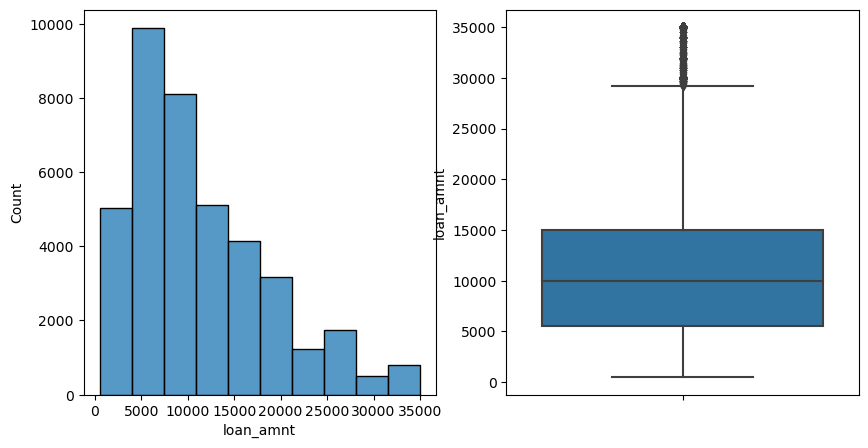

In [652]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# plot data on first subplot
sns.histplot(data=loan_df,x='loan_amnt',bins = 10,ax=ax1)
# plot data on second subplot
sns.boxplot(y=loan_df['loan_amnt'])
# display the plot
plt.show() 

In [653]:
outliers , count_of_outliers, percentage_of_outliers = find_outliers_tukey(loan_df['loan_amnt'])
#print("Threshold value for the Column {}: {}".format("loan_amnt", threshhold_value))
print("Records identified as outliers are : {} ({}%)".format(count_of_outliers,percentage_of_outliers)) 

## Although the number of records with outlier values is small, it is not recommended to replace their 
## values with mean or median as doing so can significantly affect the distribution of other columns. 
## Therefore, it may be better to remove these records from the dataset
loan_df.drop(loan_df[outliers].index,inplace=True)
loan_df.shape

Records identified as outliers are : 1230 (3%)


(38487, 37)

## annual_inc

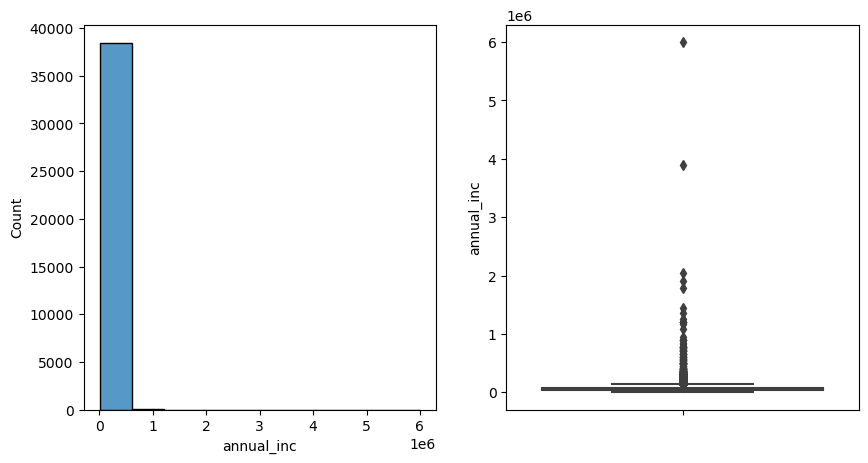

In [654]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
# plot data on first subplot
sns.histplot(data=loan_df,x='annual_inc',bins = 10,ax=ax1)
# plot data on second subplot
sns.boxplot(y=loan_df['annual_inc'],ax=ax2)
# display the plot
plt.show() 

In [655]:
outliers , count_of_outliers, percentage_of_outliers = find_outliers_tukey(loan_df['annual_inc'])
#print("Threshold value for the Column {}: {}".format("loan_amnt", threshhold_value))
print("Records identified as outliers are : {} ({}%)".format(count_of_outliers,percentage_of_outliers)) 

## Although the number of records with outlier values is small, it is not recommended to replace their 
## values with mean or median as doing so can significantly affect the distribution of other columns. 
## Therefore, it may be better to remove these records from the dataset
loan_df.drop(loan_df[outliers].index,inplace=True)
loan_df.shape

Records identified as outliers are : 1713 (4%)


(36774, 37)

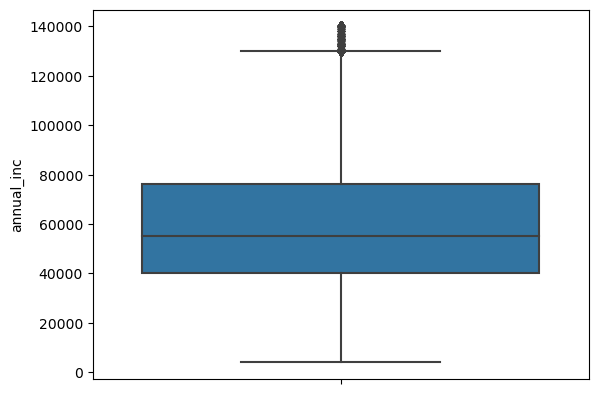

In [656]:
# plot data to show changes after removing outliers
sns.boxplot(y=loan_df['annual_inc'])
# display the plot
plt.show()

## int_rate

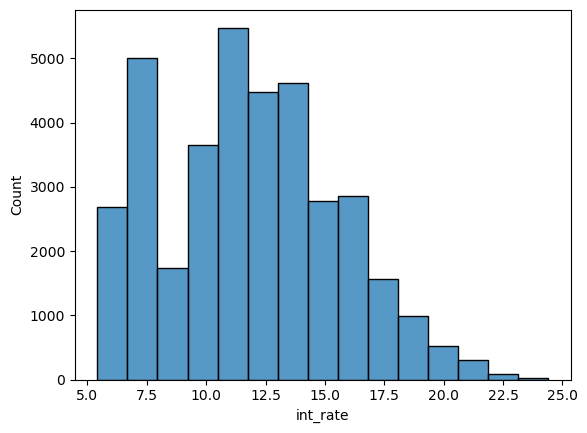

In [657]:
seaborn.histplot(data=loan_df,x='int_rate',bins=15)
plt.show()

**Intrest Rates between 10.5 and 12 are the highest**

## addr_state

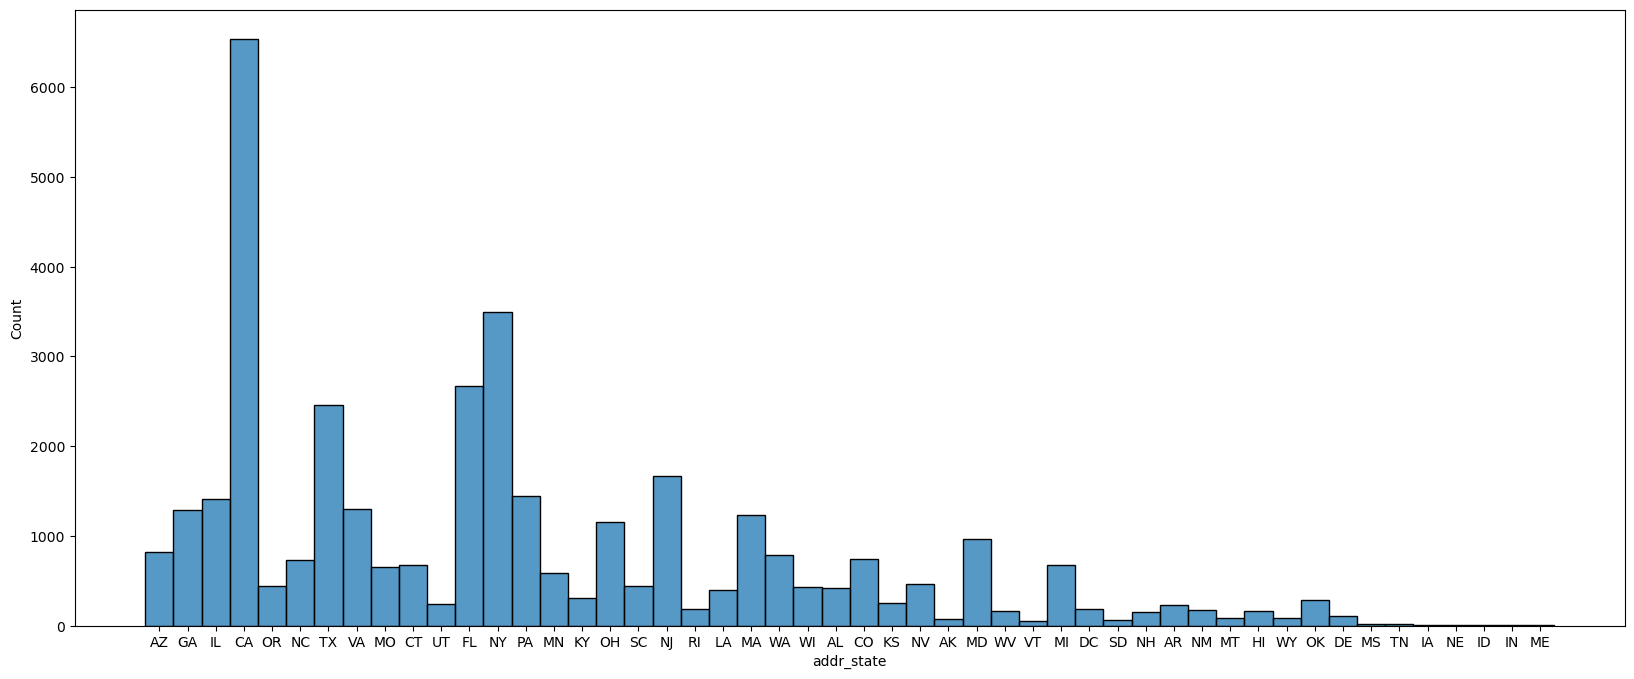

In [658]:
plt.figure(figsize=(20,8))
sns.histplot(data=loan_df,x='addr_state',bins=15)
plt.show()

**California has the highest number of loans disbursement**

## delinq_2yrs

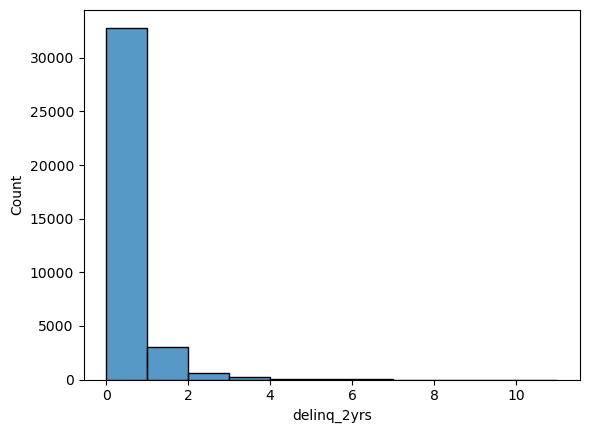

In [659]:
seaborn.histplot(data=loan_df,x='delinq_2yrs',bins=11)
plt.show()

It can be seen that the number of delinquencies are reported in last 2 years are 0.Most fo the Loans are given to people who are less delinquent

## emp_length

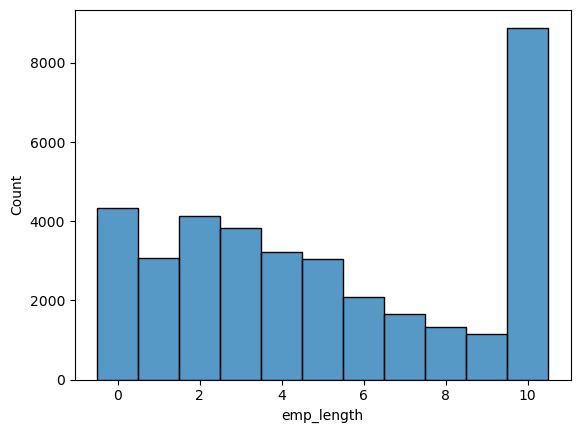

In [660]:
seaborn.histplot(data=loan_df,x='emp_length',bins=11)
plt.show()

Loans are mostly given to people with 10 or more years of experience

## home_ownership

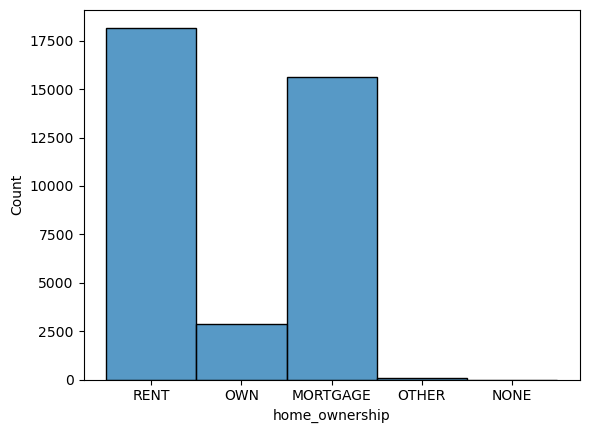

In [661]:
seaborn.histplot(data=loan_df,x='home_ownership',bins=4)
plt.show()

**Loans are mostly given to the Applicants on Rent**

## installment

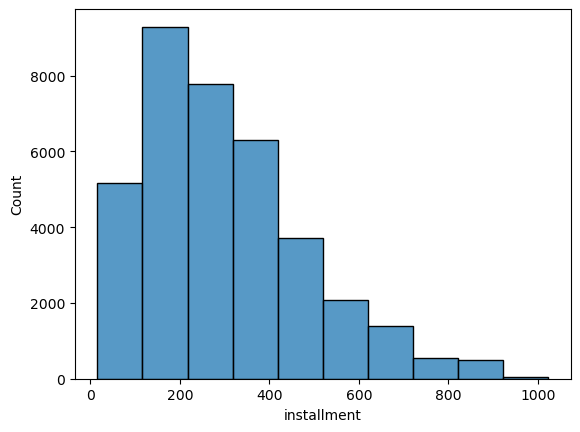

In [662]:
seaborn.histplot(data=loan_df,x='installment',bins=10)
plt.show()

** We can see that most of the installments are between 150-300 **

## loan_df

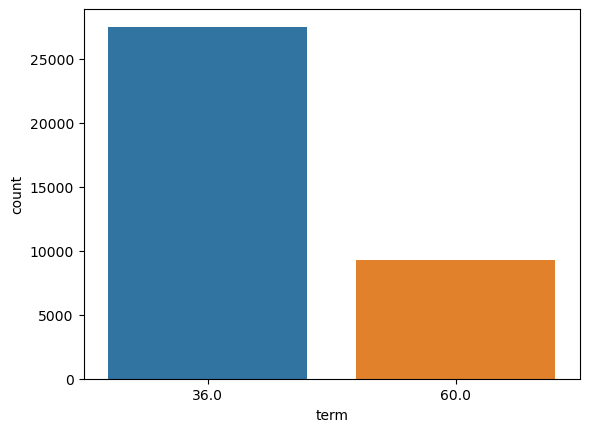

In [663]:
seaborn.countplot(data=loan_df,x='term')
plt.show()

Most of the loans have term of 36

## verification_status

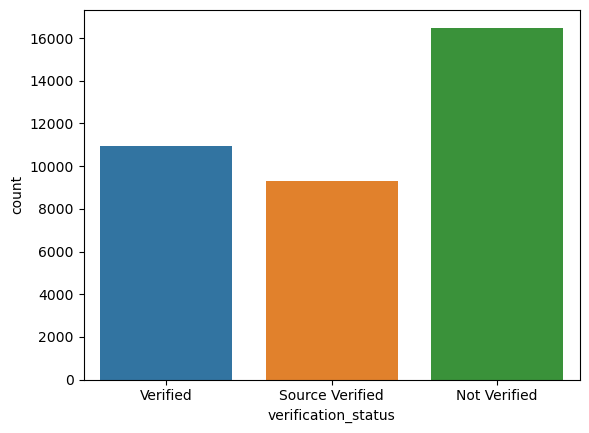

In [664]:
seaborn.countplot(data=loan_df,x='verification_status')
plt.show()

Most of the Loans are not verified

## grade

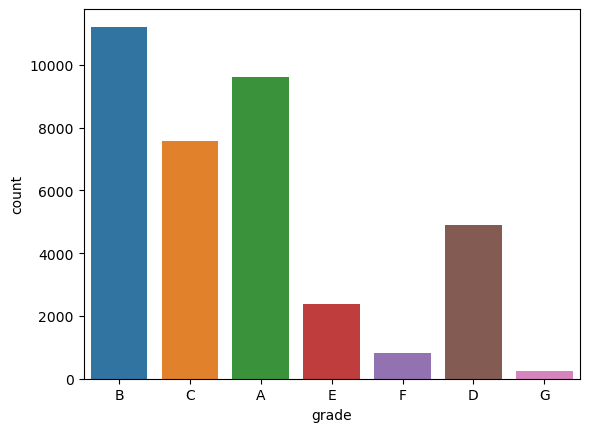

In [665]:
seaborn.countplot(data=loan_df,x='grade')
plt.show()

**Loans are mostly given in Grade B.These grades are given by the LC officer at the time of granting loans**

## purpose

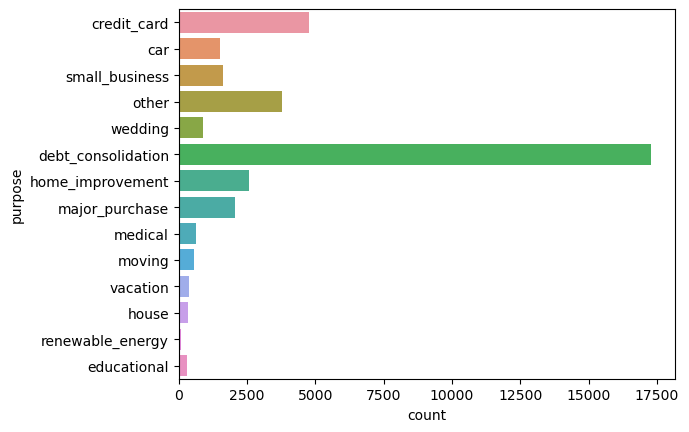

In [666]:
seaborn.countplot(data=loan_df,y='purpose')
plt.show()

**Debt Consolidation is the main reason for the loan**

## dti

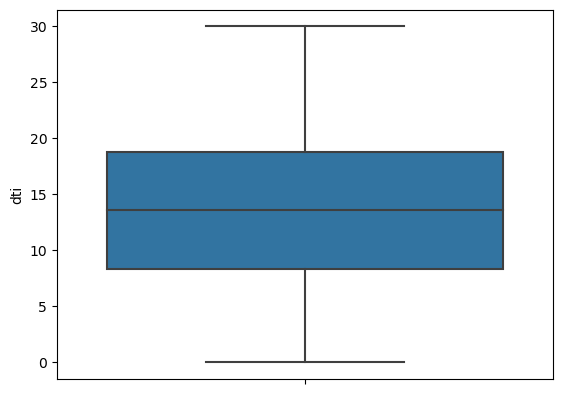

In [667]:
seaborn.boxplot(y=loan_df['dti'])
plt.show()

# Bivariate Analysis

### Common Function 

In [668]:
def create_pivot_table(col):
  table=loan_df.pivot_table(values = 'funded_amnt',
                      index = col,
                      columns = 'loan_status',
                      aggfunc = numpy.count_nonzero,
                      fill_value = 0
                      )
  table['Total']=table['Charged Off']+table['Current']+table['Fully Paid']
  table['Charged Off Rate']=100*(round((table['Charged Off']/table['Total']), 6))
  return table

def create_bivariate_barplot_graph(x_axis,y_axis,type):
       if type=='barplot':
            seaborn.barplot(x=x_axis,y=y_axis) 
            plt.show()
            return


###  Home OwnerShip and Charge off 

In [669]:
chargeoff_rate_homeownership=create_pivot_table('home_ownership')
chargeoff_rate_homeownership

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
home_ownership,,,,,
MORTGAGE,2059,497,13066,15622,13.1801
NONE,0,0,3,3,0.0000
OTHER,17,0,75,92,18.4783
OWN,419,74,2385,2878,14.5587
RENT,2707,379,15093,18179,14.8908


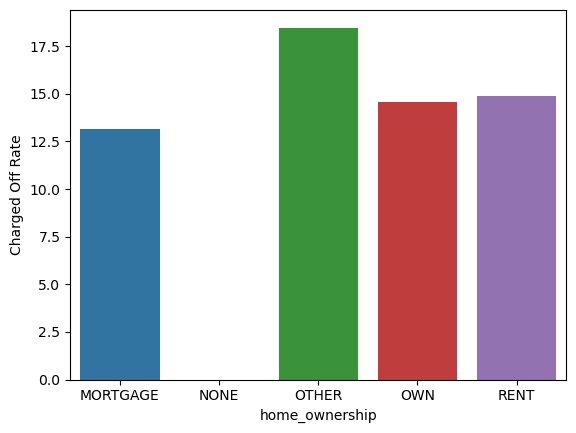

In [670]:
create_bivariate_barplot_graph(chargeoff_rate_homeownership[0:].index,
                               chargeoff_rate_homeownership[0:]['Charged Off Rate'],'barplot')

### addr_state and Charge off

In [671]:
chargeoff_rate_state=create_pivot_table('addr_state')
chargeoff_rate_state

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
addr_state,,,,,
AK,13,1,55,69,18.8406
AL,48,13,361,422,11.3744
AR,26,10,199,235,11.0638
AZ,115,25,678,818,14.0587
CA,1035,123,5382,6540,15.8257
CO,91,24,629,744,12.2312
CT,87,21,565,673,12.9272
DC,11,2,176,189,5.8201
DE,12,0,96,108,11.1111


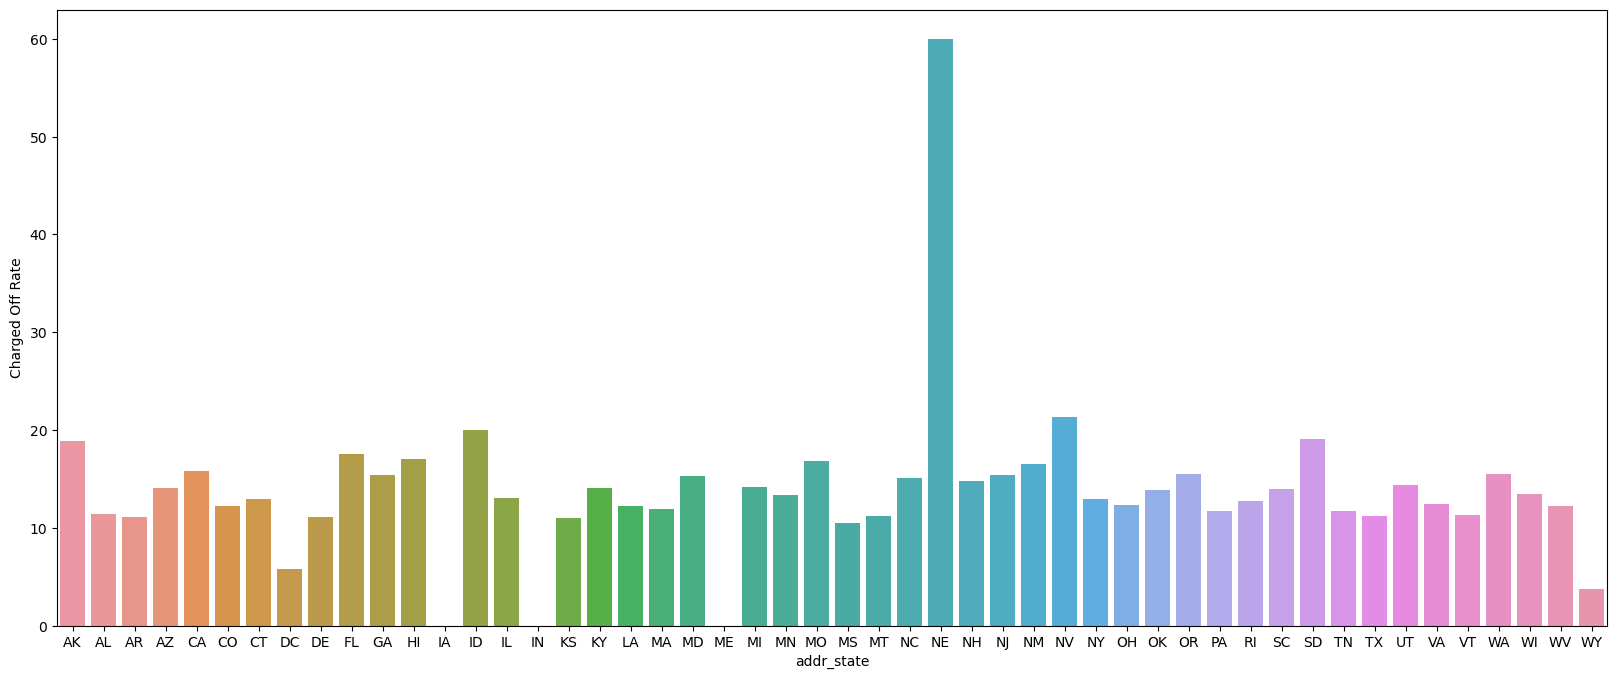

In [672]:
plt.figure(figsize=(20,8))
create_bivariate_barplot_graph(chargeoff_rate_state[0:].index,chargeoff_rate_state[0:]['Charged Off Rate'],'barplot')

### purpose and Charge off

In [674]:
chargeoff_rate_purpose=create_pivot_table('purpose')
chargeoff_rate_purpose

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
purpose,,,,,
car,159,49,1288,1496,10.6283
credit_card,502,84,4193,4779,10.5043
debt_consolidation,2544,485,14260,17289,14.7146
educational,54,0,258,312,17.3077
home_improvement,313,72,2170,2555,12.2505
house,52,9,275,336,15.4762
major_purchase,215,34,1813,2062,10.4268
medical,102,9,535,646,15.7895
moving,90,7,459,556,16.1871


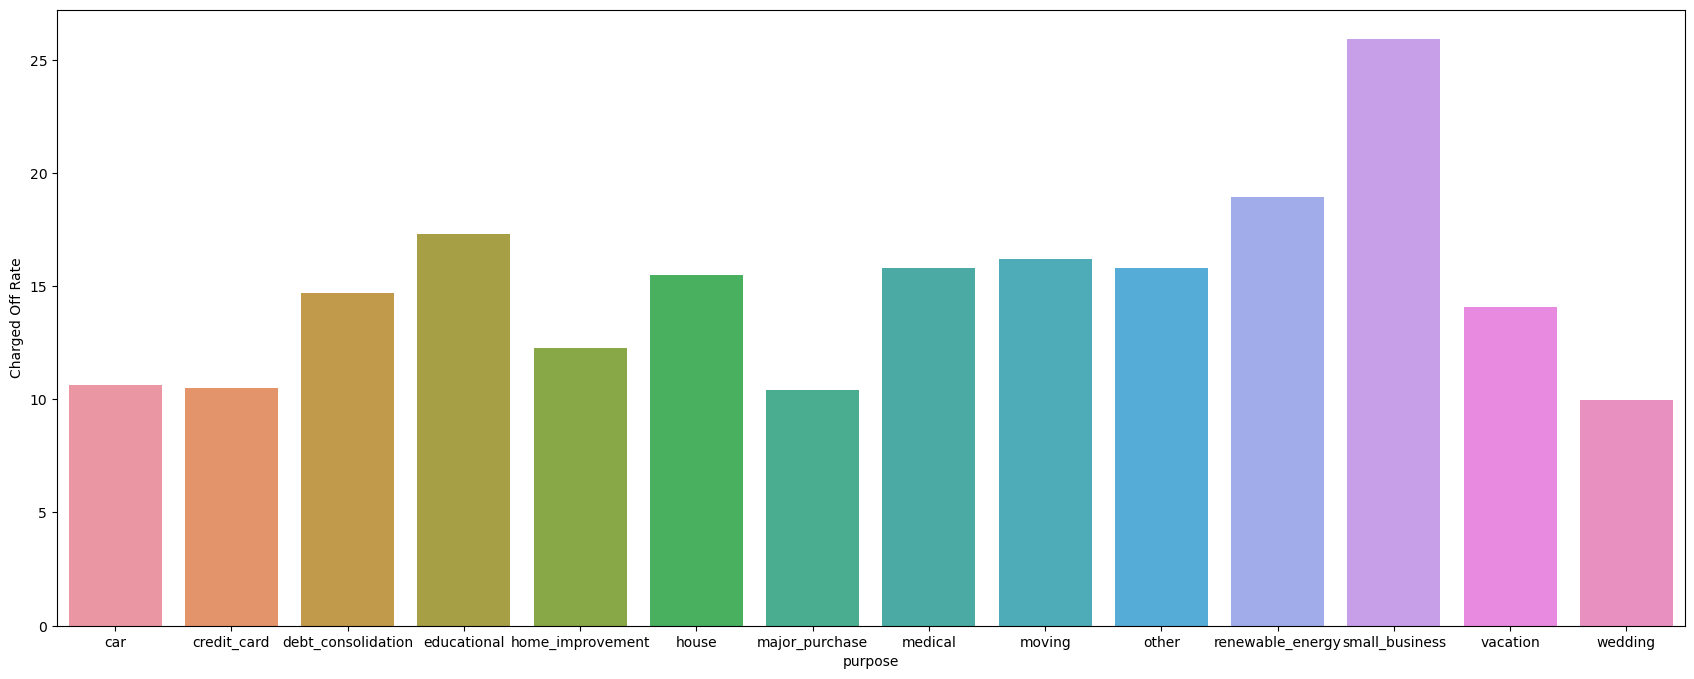

In [675]:
plt.figure(figsize=(21,8))
create_bivariate_barplot_graph(chargeoff_rate_purpose[0:].index,chargeoff_rate_purpose[0:]['Charged Off Rate'],'barplot')

### Term and Charge Off

In [676]:
chargeoff_rate_term=create_pivot_table('term')
chargeoff_rate_term


loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
term,,,,,
36.0,3091,0,24427,27518,11.2326
60.0,2111,950,6195,9256,22.8068


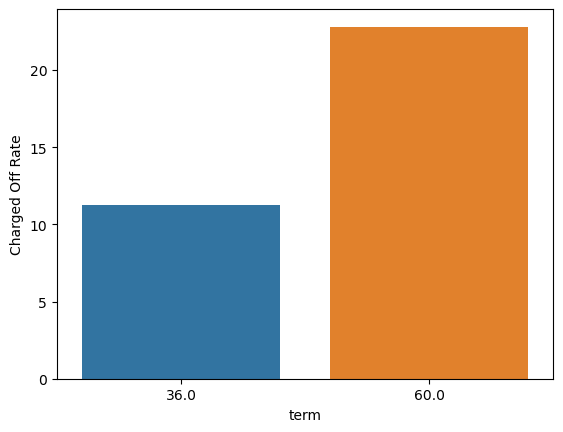

In [677]:
create_bivariate_barplot_graph(chargeoff_rate_term[0:].index,chargeoff_rate_term[0:]['Charged Off Rate'],'barplot')

### grade and Charge Off

In [679]:
chargeoff_rate_grade=create_pivot_table('grade')
chargeoff_rate_grade

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
grade,,,,,
A,591,39,8999,9629,6.1377
B,1347,286,9587,11220,12.0053
C,1290,230,6052,7572,17.0365
D,1042,198,3669,4909,21.2263
E,598,145,1630,2373,25.2002
F,252,41,540,833,30.2521
G,82,11,145,238,34.4538


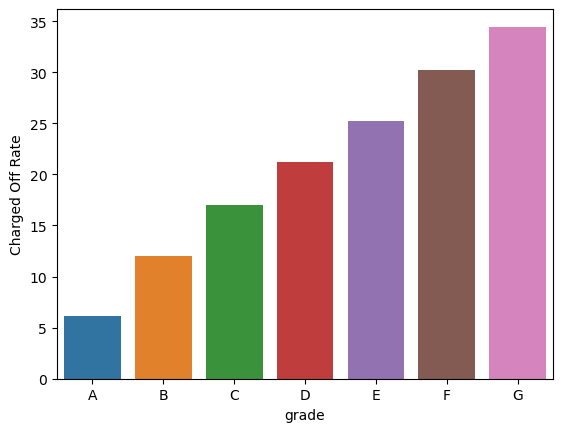

In [680]:
create_bivariate_barplot_graph(chargeoff_rate_grade[0:].index,chargeoff_rate_grade[0:]['Charged Off Rate'],'barplot')

### emp_length and Charge off

In [681]:
chargeoff_rate_employment_length=create_pivot_table('emp_length')
chargeoff_rate_employment_length

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
emp_length,,,,,
0,601,65,3667,4333,13.8703
10,1402,343,7148,8893,15.7652
1,441,61,2565,3067,14.3789
2,535,83,3514,4132,12.9477
3,514,66,3251,3831,13.4169
4,428,85,2711,3224,13.2754
5,424,73,2554,3051,13.8971
6,284,54,1743,2081,13.6473
7,240,57,1364,1661,14.4491


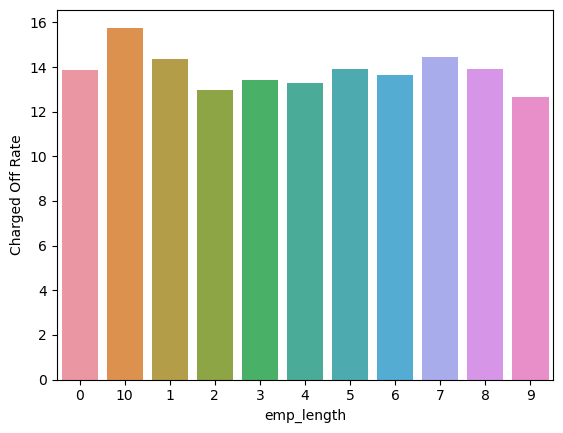

In [683]:
create_bivariate_barplot_graph(chargeoff_rate_employment_length[0:].index
                               ,chargeoff_rate_employment_length[0:]['Charged Off Rate'],'barplot')

### annual_inc_rng and charge Off

In [684]:
chargeoff_rate_annual_income=create_pivot_table('annual_inc_rng')
chargeoff_rate_annual_income


loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
annual_inc_rng,,,,,
0-20000,237,9,943,1189,19.9327
20000-40000,1514,169,7004,8687,17.4283
40000-60000,1705,340,9494,11539,14.7760
60000-80000,958,200,6435,7593,12.6169
80000-100000,468,149,3798,4415,10.6002
100000-120000,203,57,1968,2228,9.1113
120000-140000,117,26,980,1123,10.4185


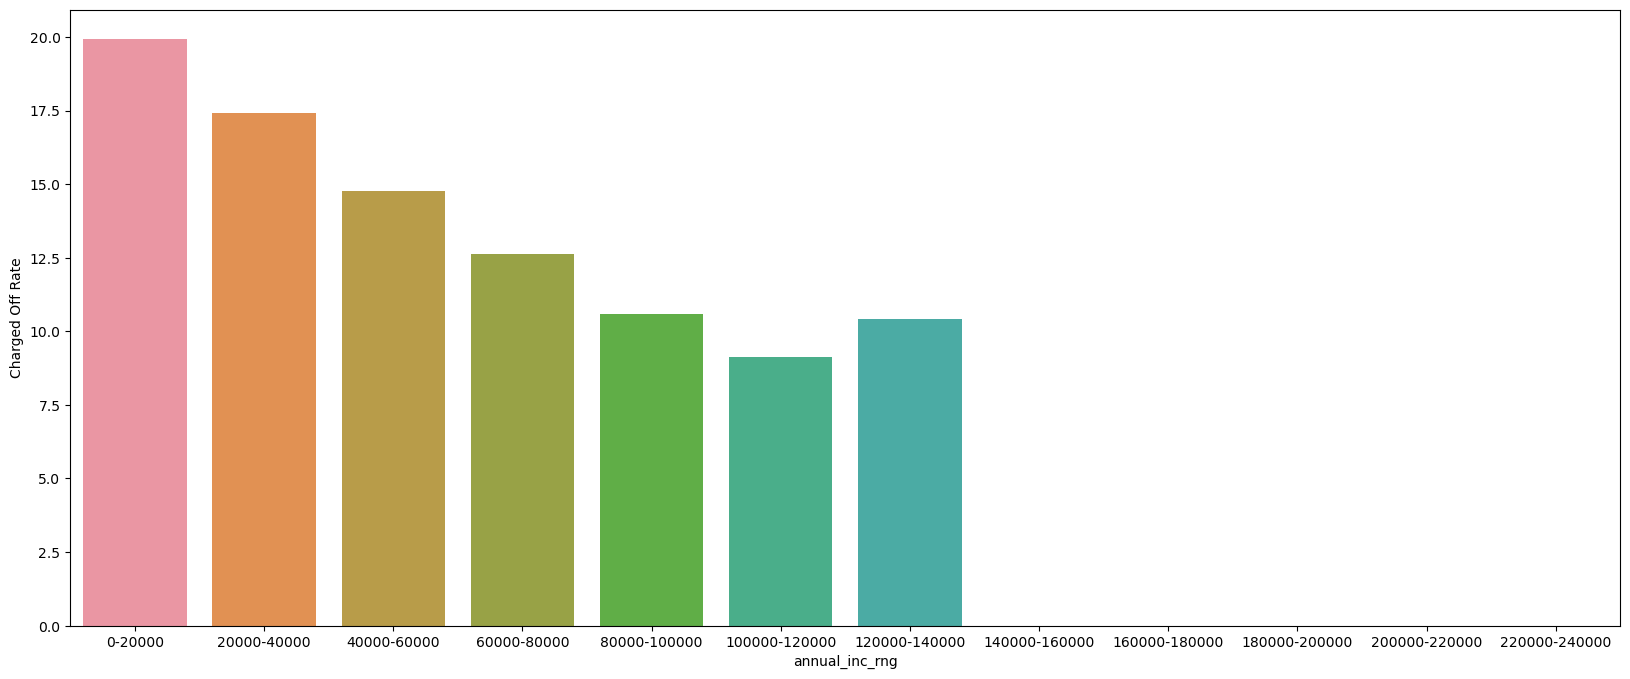

In [686]:
plt.figure(figsize=(20,8))

create_bivariate_barplot_graph(chargeoff_rate_annual_income[0:].index,
                               chargeoff_rate_annual_income[0:]['Charged Off Rate'],'barplot')

### delinq_2yrs and charge Off

In [687]:
chargeoff_rate_delinq=create_pivot_table('delinq_2yrs')
chargeoff_rate_delinq


loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
delinq_2yrs,,,,,
0,4571,852,27395,32818,13.9283
1,467,78,2494,3039,15.3669
2,112,11,492,615,18.2114
3,34,6,166,206,16.5049
4,13,2,44,59,22.0339
5,2,1,16,19,10.5263
6,1,0,9,10,10.0000
7,1,0,3,4,25.0000
8,1,0,1,2,50.0000


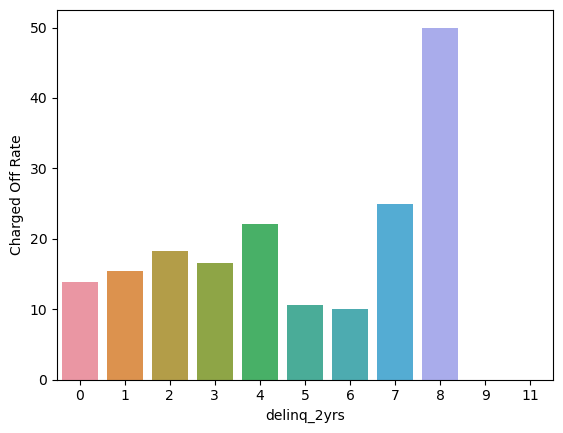

In [688]:
create_bivariate_barplot_graph(chargeoff_rate_delinq[0:].index,
                               chargeoff_rate_delinq[0:]['Charged Off Rate'],'barplot')

### inq_last_6mths and Charge off

In [690]:
chargeoff_rate_inquiries=create_pivot_table('inq_last_6mths')
chargeoff_rate_inquiries

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
inq_last_6mths,,,,,
0,2115,481,15348,17944,11.7867
1,1544,267,8363,10174,15.1759
2,877,132,4343,5352,16.3864
3,571,56,2165,2792,20.4513
4,45,10,233,288,15.6250
5,23,1,106,130,17.6923
6,15,1,36,52,28.8462
7,9,1,21,31,29.0323
8,3,1,7,11,27.2727


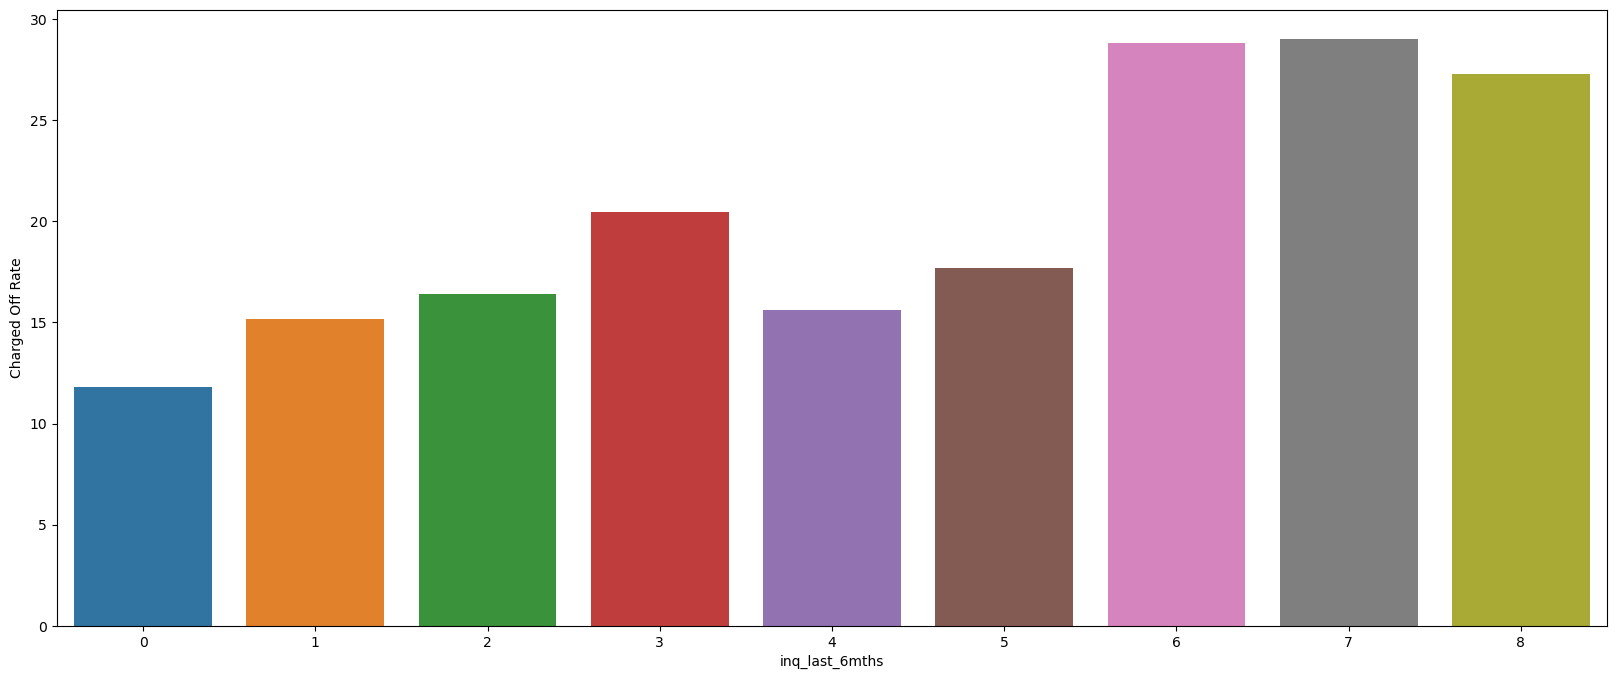

In [691]:
plt.figure(figsize=(20,8))
create_bivariate_barplot_graph(chargeoff_rate_inquiries[0:].index,
                               chargeoff_rate_inquiries[0:]['Charged Off Rate'],'barplot')

### pub_rec and charge off

In [692]:
chargeoff_rate_pub_rec=create_pivot_table('pub_rec')
chargeoff_rate_pub_rec


loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
pub_rec,,,,,
0,4755,909,29075,34739,13.6878
1,437,39,1503,1979,22.0819
2,10,2,36,48,20.8333
3,0,0,6,6,0.0000
4,0,0,2,2,0.0000


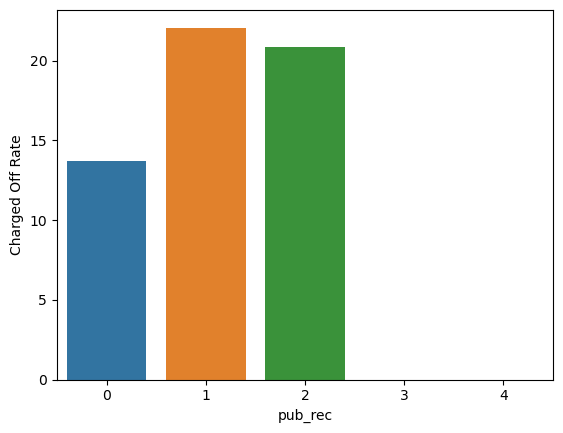

In [693]:
create_bivariate_barplot_graph(chargeoff_rate_pub_rec[0:].index,chargeoff_rate_pub_rec[0:]['Charged Off Rate'],'barplot')

### pub_rec_bankruptcies and Charge Off

In [697]:
chargeoff_rate_pub_rec_bkr=create_pivot_table('pub_rec_bankruptcies')
chargeoff_rate_pub_rec_bkr

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
pub_rec_bankruptcies,,,,,
0.0,4850,916,29393,35159,13.7945
1.0,350,33,1226,1609,21.7526
2.0,2,1,3,6,33.3333


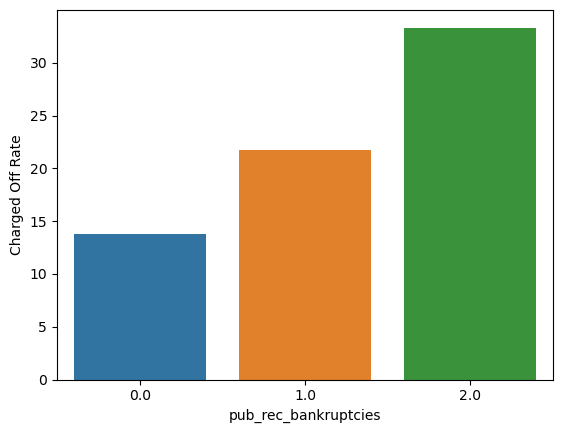

In [698]:
create_bivariate_barplot_graph(chargeoff_rate_pub_rec_bkr[0:].index,
                               chargeoff_rate_pub_rec_bkr[0:]['Charged Off Rate'],'barplot')

### verification_status and charge Off

In [699]:
chargeoff_verify_status=create_pivot_table('verification_status')
chargeoff_verify_status

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
verification_status,,,,,
Not Verified,2094,224,14176,16494,12.6955
Source Verified,1346,269,7702,9317,14.4467
Verified,1762,457,8744,10963,16.0722


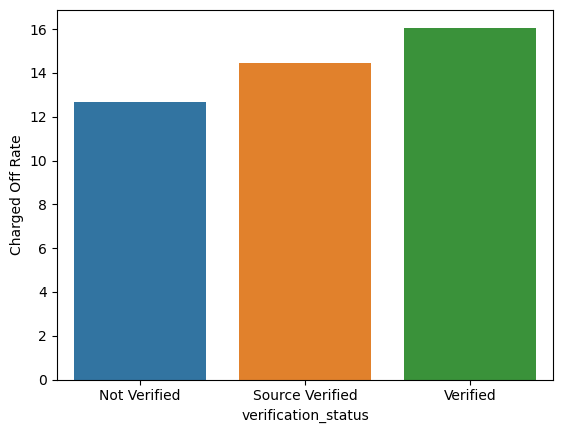

In [700]:
create_bivariate_barplot_graph(chargeoff_verify_status[0:].index,
                               chargeoff_verify_status[0:]['Charged Off Rate'],'barplot')

### int_rng  and Charge off

In [703]:
chargeoff_verify_int=create_pivot_table('int_rng')
chargeoff_verify_int

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
int_rng,,,,,
5-10,809,71,10942,11822,6.8432
10-15,2573,443,14530,17546,14.6643
15-20,1601,375,4819,6795,23.5614
20-25,219,61,331,611,35.8429


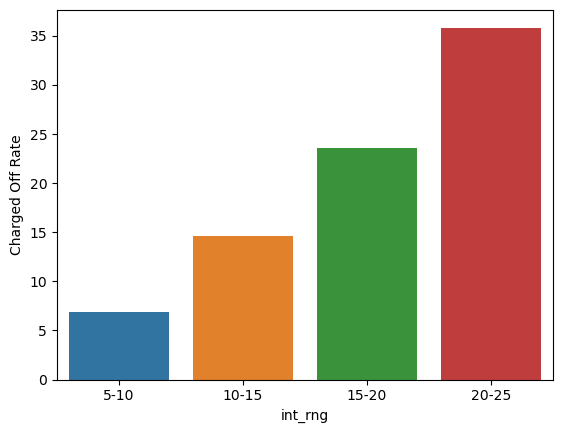

In [704]:
create_bivariate_barplot_graph(chargeoff_verify_int[0:].index
                               ,chargeoff_verify_int[0:]['Charged Off Rate'],'barplot')

### loan_amnt_rng and Charge Off

In [705]:
chargeoff_verify_loan_amnt=create_pivot_table('loan_amnt_rng')
chargeoff_verify_loan_amnt

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
loan_amnt_rng,,,,,
0-7000,1864,160,12185,14209,13.1184
7000-14000,1742,302,11068,13112,13.2855
14000-21000,1109,327,5449,6885,16.1075
21000-28000,480,154,1888,2522,19.0325
28000 +,7,7,32,46,15.2174


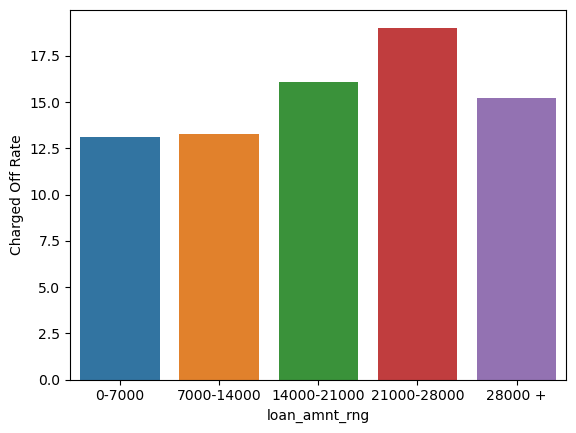

In [706]:
create_bivariate_barplot_graph(chargeoff_verify_loan_amnt[0:].index,
                               chargeoff_verify_loan_amnt[0:]['Charged Off Rate'],'barplot')

### issue_year and  charge off

In [707]:
chargeoff_verify_year_wise=create_pivot_table('issue_year')
chargeoff_verify_year_wise

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
issue_year,,,,,
2007,41,0,189,230,17.8261
2008,237,0,1252,1489,15.9167
2009,567,0,3908,4475,12.6704
2010,1429,0,9578,11007,12.9826
2011,2928,950,15695,19573,14.9594


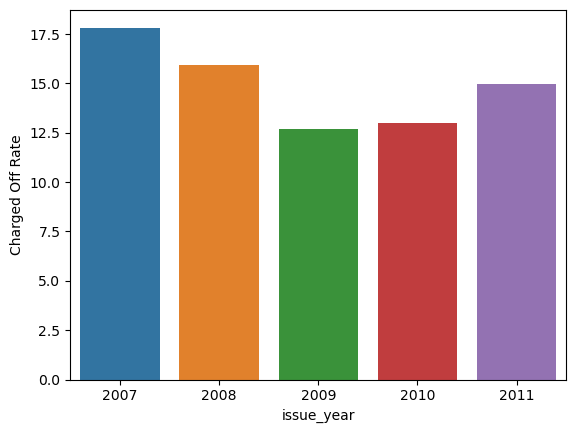

In [708]:
create_bivariate_barplot_graph(chargeoff_verify_year_wise[0:].index,
                               chargeoff_verify_year_wise[0:]['Charged Off Rate'],'barplot')

### dti_rng and charge Off

In [710]:
chargeoff_verify_dti=create_pivot_table('dti_rng')
chargeoff_verify_dti

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
dti_rng,,,,,
0-5,547,68,3826,4441,12.3170
5-10,909,154,6219,7282,12.4828
10-15,1296,226,7664,9186,14.1084
15-20,1281,233,7024,8538,15.0035
25-30,1063,213,5237,6513,16.3212


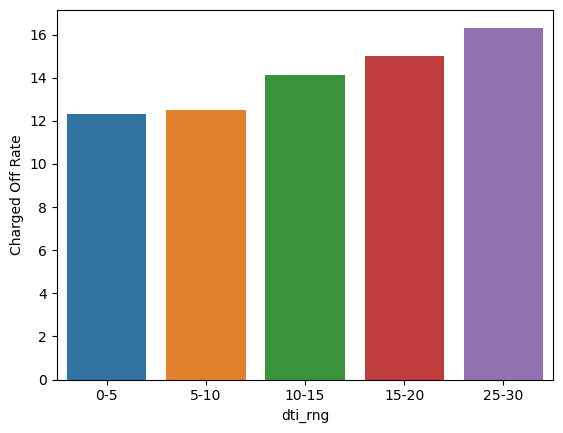

In [711]:
create_bivariate_barplot_graph(chargeoff_verify_dti[0:].index,
                               chargeoff_verify_dti[0:]['Charged Off Rate'],'barplot')

# Segmented Univariate Analysis

Getting the number of Charged Off Loan and Loans Paid in Complete

[Text(0, 0, '32950'), Text(0, 0, '5627')]

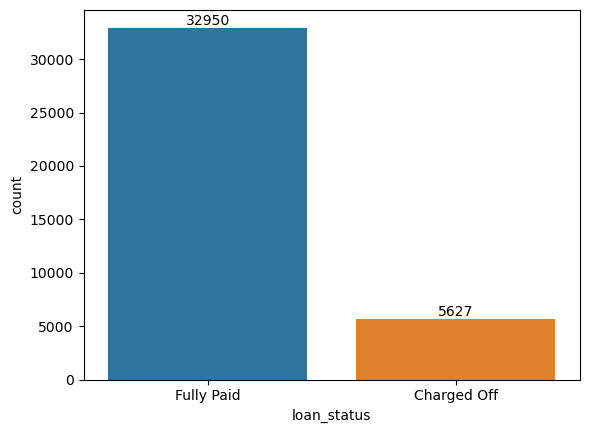

In [712]:
ax =seaborn.countplot(x=loan_df_filtered['loan_status'],data=loan_df_filtered)
ax.bar_label(ax.containers[0])

It can be seen from the above plot that we have 5627 as Charged Off Loan and Fully Paid loan are 32950

Now we will gather the categorical variables from the dataset and see the relation of Loan Default with them

#### Categorical Univariate Analysis





Checking the Grade of the Loans which are charged off

In [713]:
loan_charged_off=loan_df_filtered[(loan_df_filtered['loan_status']=='Charged Off')]

In [714]:
loan_charged_off['grade'].count()

5627

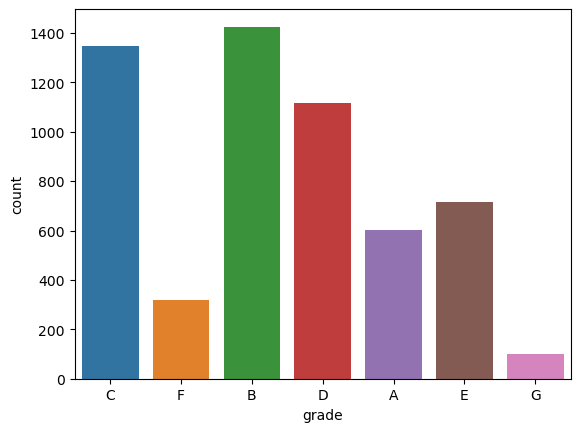

In [715]:
seaborn.countplot(x=loan_charged_off['grade'],data=loan_charged_off)
plt.show()

**It can be seen from the above graphical representation that Loans of Grade B are mostly defaulted**

Checking the employment tenure of the people who have defaulted on loans

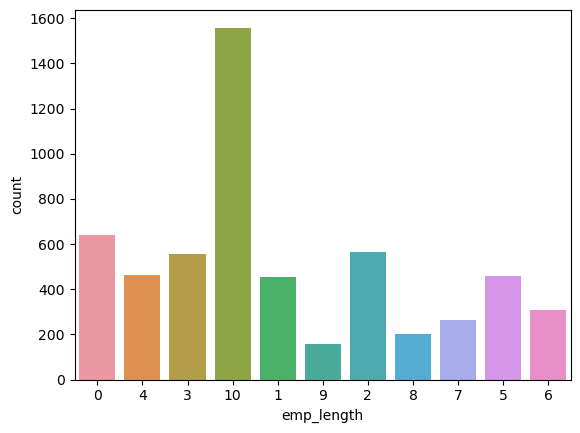

In [716]:
seaborn.countplot(x=loan_charged_off['emp_length'],data=loan_charged_off)
plt.show()

**It can be seen from the above graph employees which 10 or more years of experience have tendency to default on Loan**

Checking what is the status of home ownership of defaulted people

<Axes: xlabel='home_ownership', ylabel='count'>

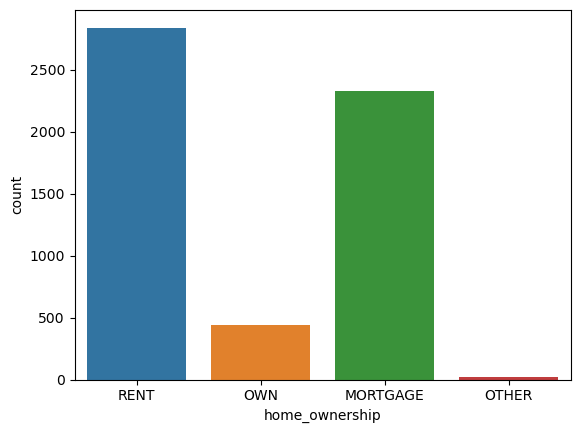

In [717]:
seaborn.countplot(x=loan_charged_off['home_ownership'],data=loan_charged_off)

**Maximum number of people who have defaulted have rented accomadation**

Now we will check from what state most of the defaulted people were

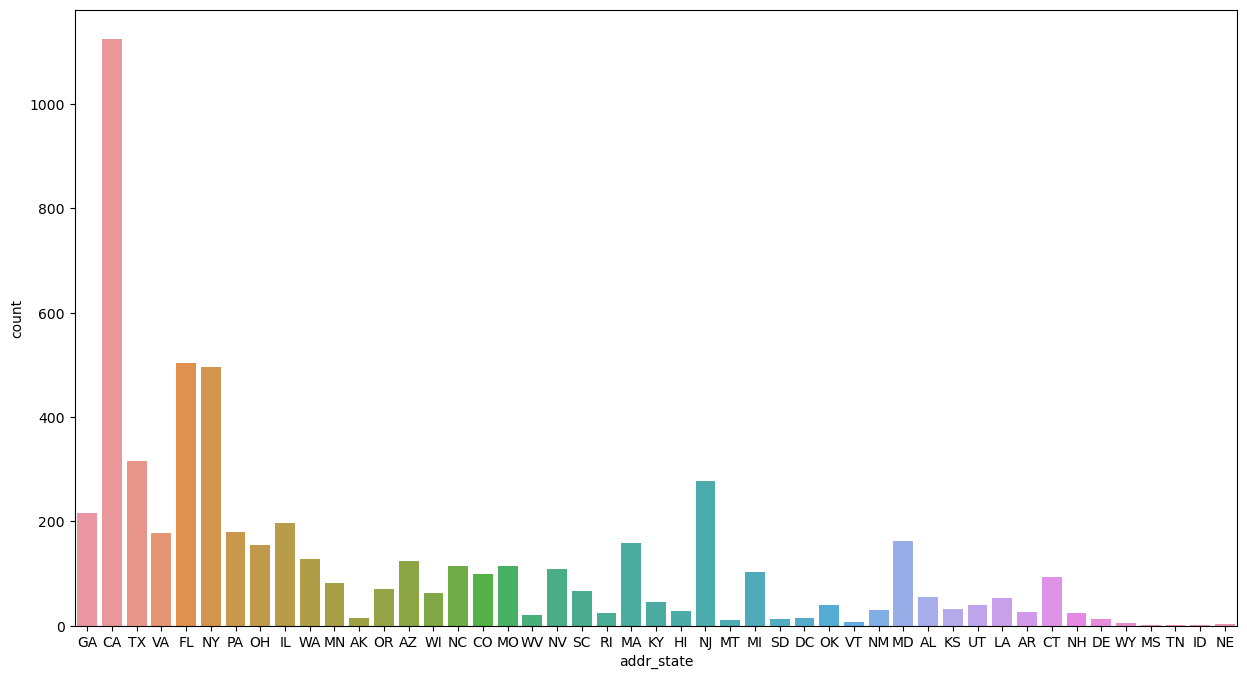

In [718]:
plt.figure(figsize=(15,8))
fig=seaborn.countplot(x=loan_charged_off['addr_state'],data=loan_charged_off)

**Majority of the defaults are happening from the state of California**

Now we will validate if the income of the applicants for defaulted loan was verified or not

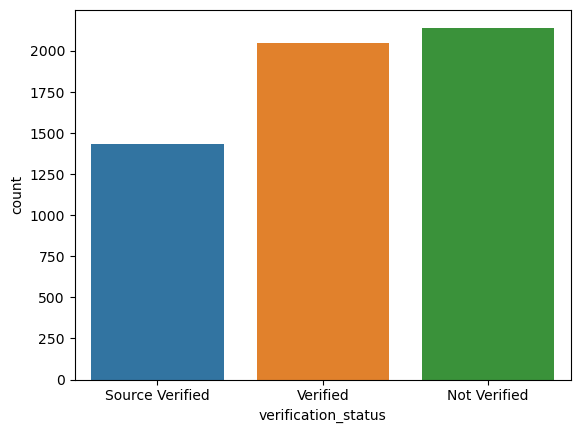

In [719]:
fig=seaborn.countplot(x=loan_charged_off['verification_status'],data=loan_charged_off)

**It is evident from the above graph that source of income of the defaulers was not verified**

Now we will check if any particular purpose of a loan plays an important part in defaulting on loan payment

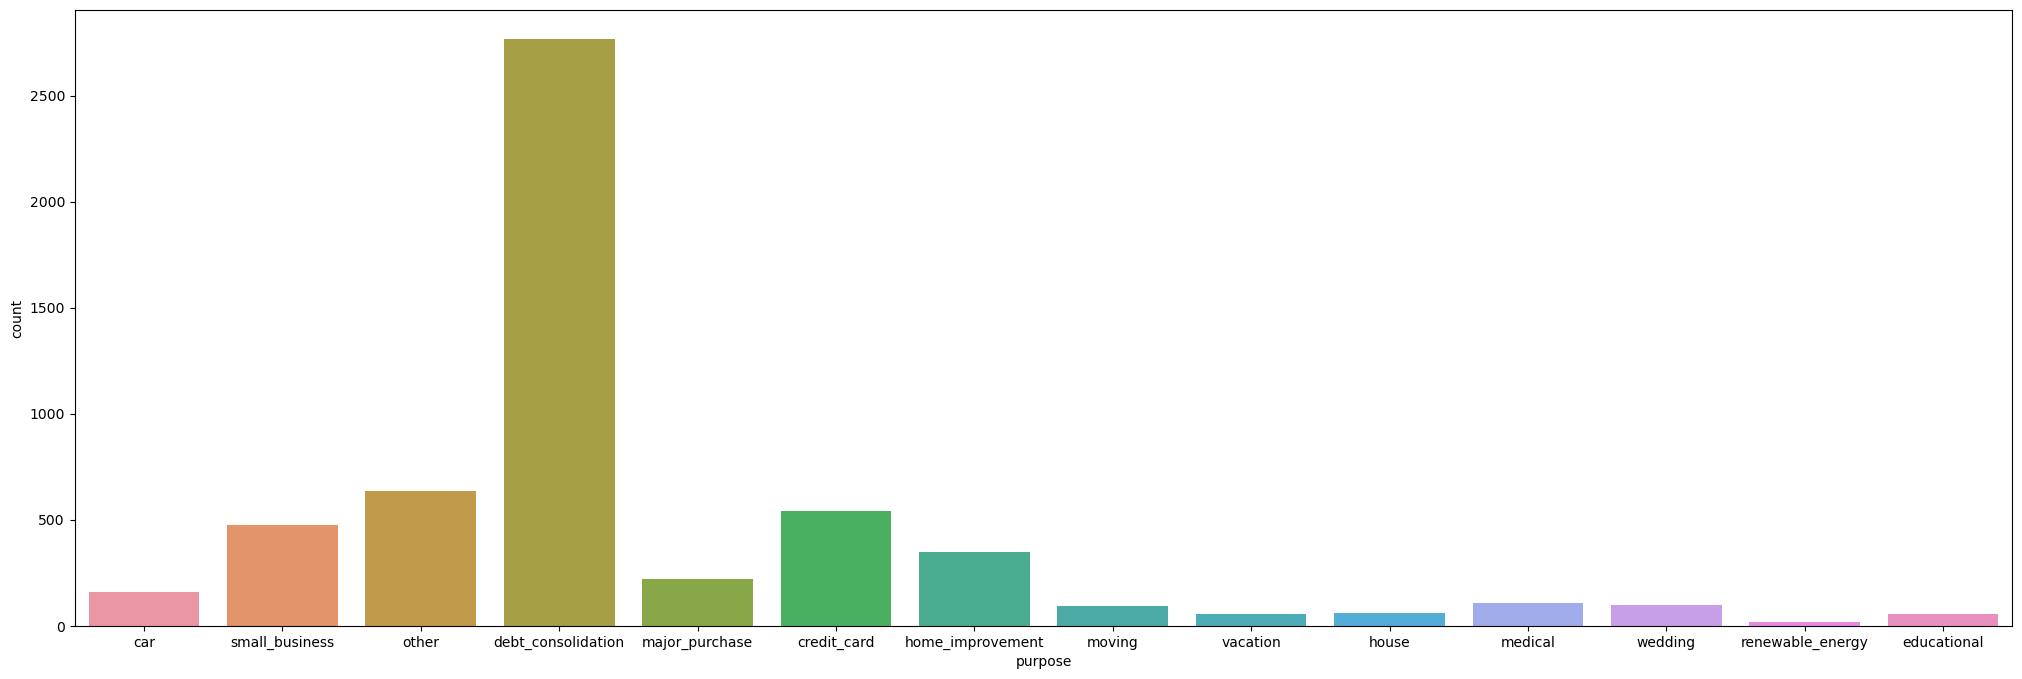

In [720]:
plt.figure(figsize=(25,8))
fig=seaborn.countplot(x=loan_charged_off['purpose'],data=loan_charged_off)

**From the above graph it could be seen that debt consolidation is the main purpose for which loan is taken and defaulted.This means that people already have certain debt on them**

Now we will see the month in which loans issued are defaulted

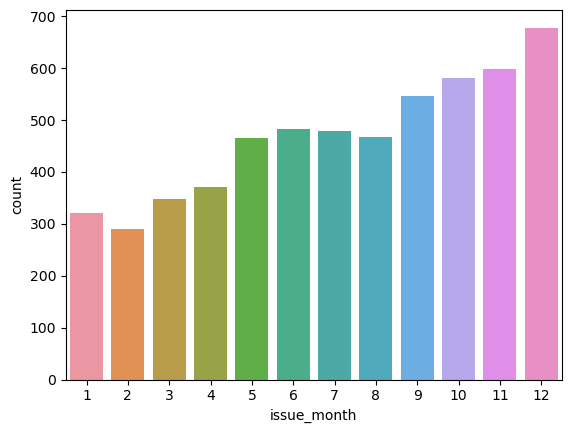

In [721]:
fig=seaborn.countplot(x=loan_charged_off['issue_month'],data=loan_charged_off)

**Most of the loans are issued in the month of December.This seems fair as it is Holiday season and people apply for loans**

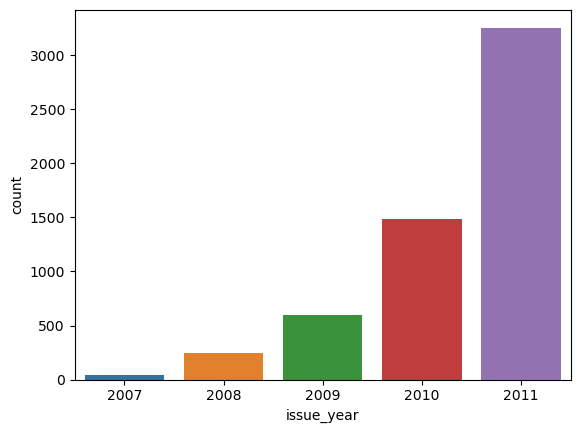

In [722]:
fig=seaborn.countplot(x=loan_charged_off['issue_year'],data=loan_charged_off)

**The number of loans issued have increased consistently and os has the default rate**

#### Univariate Loan Default Analysis with Continuous Variables

# *Multivariate* Analysis

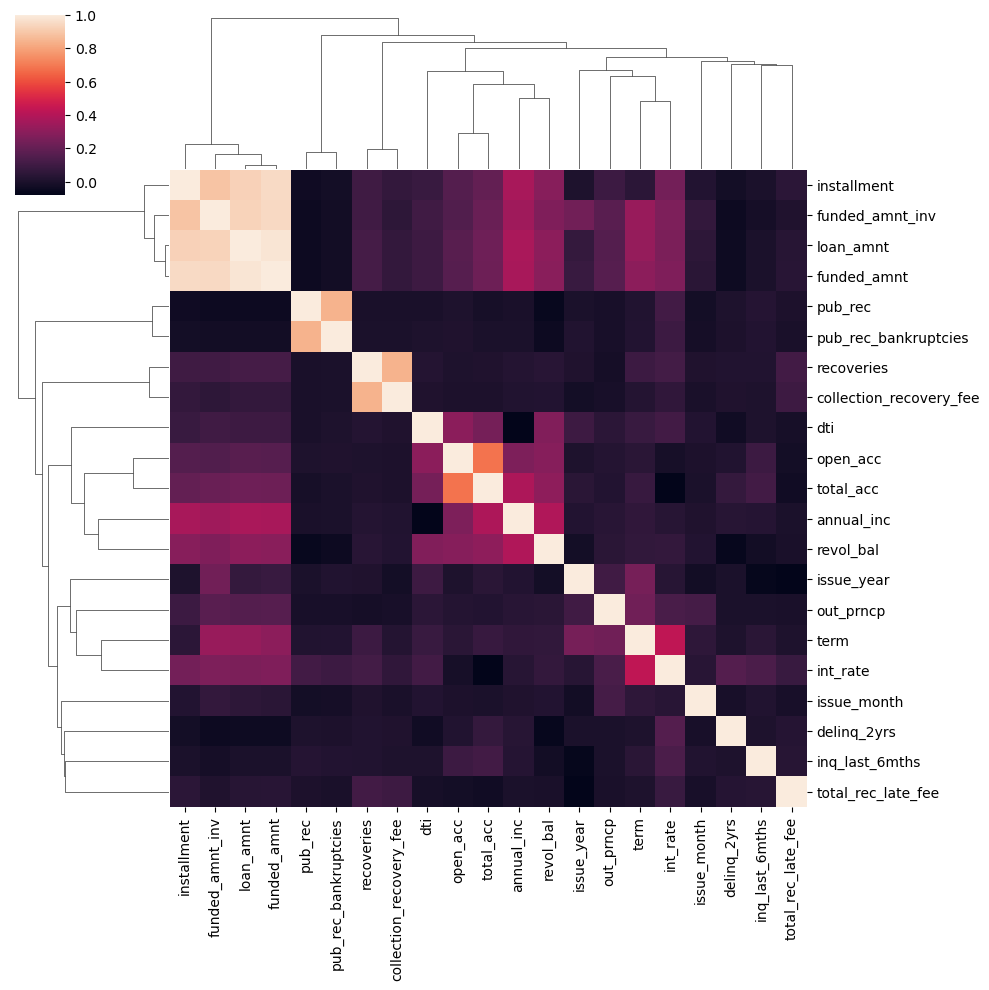

In [724]:
seaborn.clustermap(loan_df.corr())
plt.show()

As it can be seen from the above heat map.

1.   There is very high correlation between loan_amnt,funded_amnt,funded_amnt_inv.

2.   There is high correlation between pub_rec_bankruptcies and pub_rec

3.   There is medium correlation between open_acc and total_acc

4.   There is relatively medium correlation between term and int_rate





#Conclusion